# **Project : Predictions On Heart Disease**

**In this project, we will try to predict if a person suffers from a heart disease/attack. This topic can be really essential, as we are trying to provide healthcare services with AI, predicting such diseases with accuracy can be very essential.
So, in this project we are collecting the data from the dataset available on Kaggle on (https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset) and I'll be using Machine Learning Algorithms to predict whether a person is suffering from a heart disease or not.**

## **Libraries**

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Importing Classifiers, scalers, encoders, etc...
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler, RobustScaler
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import GaussianNB, MultinomialNB

import warnings
warnings.filterwarnings("ignore")

## **Training Dataset**

In [2]:
df = pd.read_csv('heart_test.csv')

1. `age` - Age of the patient
2. `sex` - Sex of the patient
3. `cp` - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
4. `trtbps` - Resting blood pressure (in mm Hg)
5. `chol` - Cholestoral in mg/dl fetched via BMI sensor
6. `fbs` - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
7. `restecg` - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
8. `thalachh` - Maximum heart rate achieved
9. `exng` - Exercise induced angina ~ 1 = Yes, 0 = No
10. `oldpeak` - Previous peak
11. `slp` - Slope
12. `caa` - Number of major vessels
13. `thall` - Thalium Stress Test result ~ (0,3) 
14. `output` - Target variable

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [7]:
# Lets Chackn if there is any null values in any of the series of the dataset 
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(keep='first', inplace=True)

## **EXPLORATORY DATA ANALYSIS**

Exploratory Data Analysis or EDA is one of the most essential step in the model making using the machine learning algorithms. EDA helps us to get some key takeaways from the dataset, which helps us to build an efficient model. So, let's do it. 

Text(0.5, 1.0, 'Sex w.r.t output')

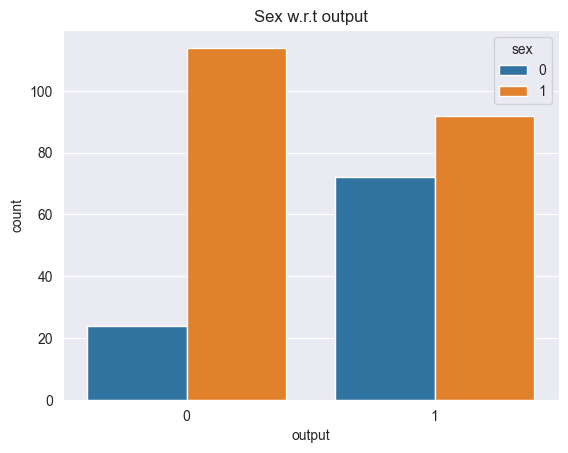

In [10]:
sns.set_style('darkgrid')
sns.countplot(x='output', hue='sex', data=df)
plt.title('Sex w.r.t output')

<Axes: xlabel='output', ylabel='count'>

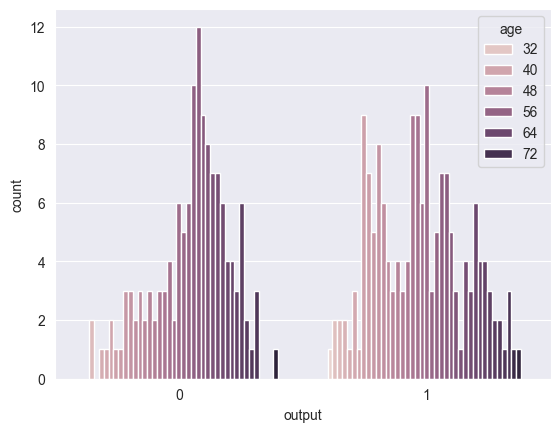

In [11]:
sns.set_style('darkgrid')
sns.countplot(x='output', hue='age', data=df)

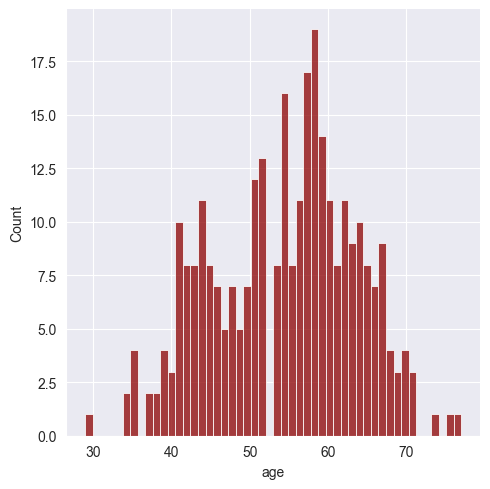

In [12]:
sns.displot(df['age'], kde=False, color='darkred', bins=50)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

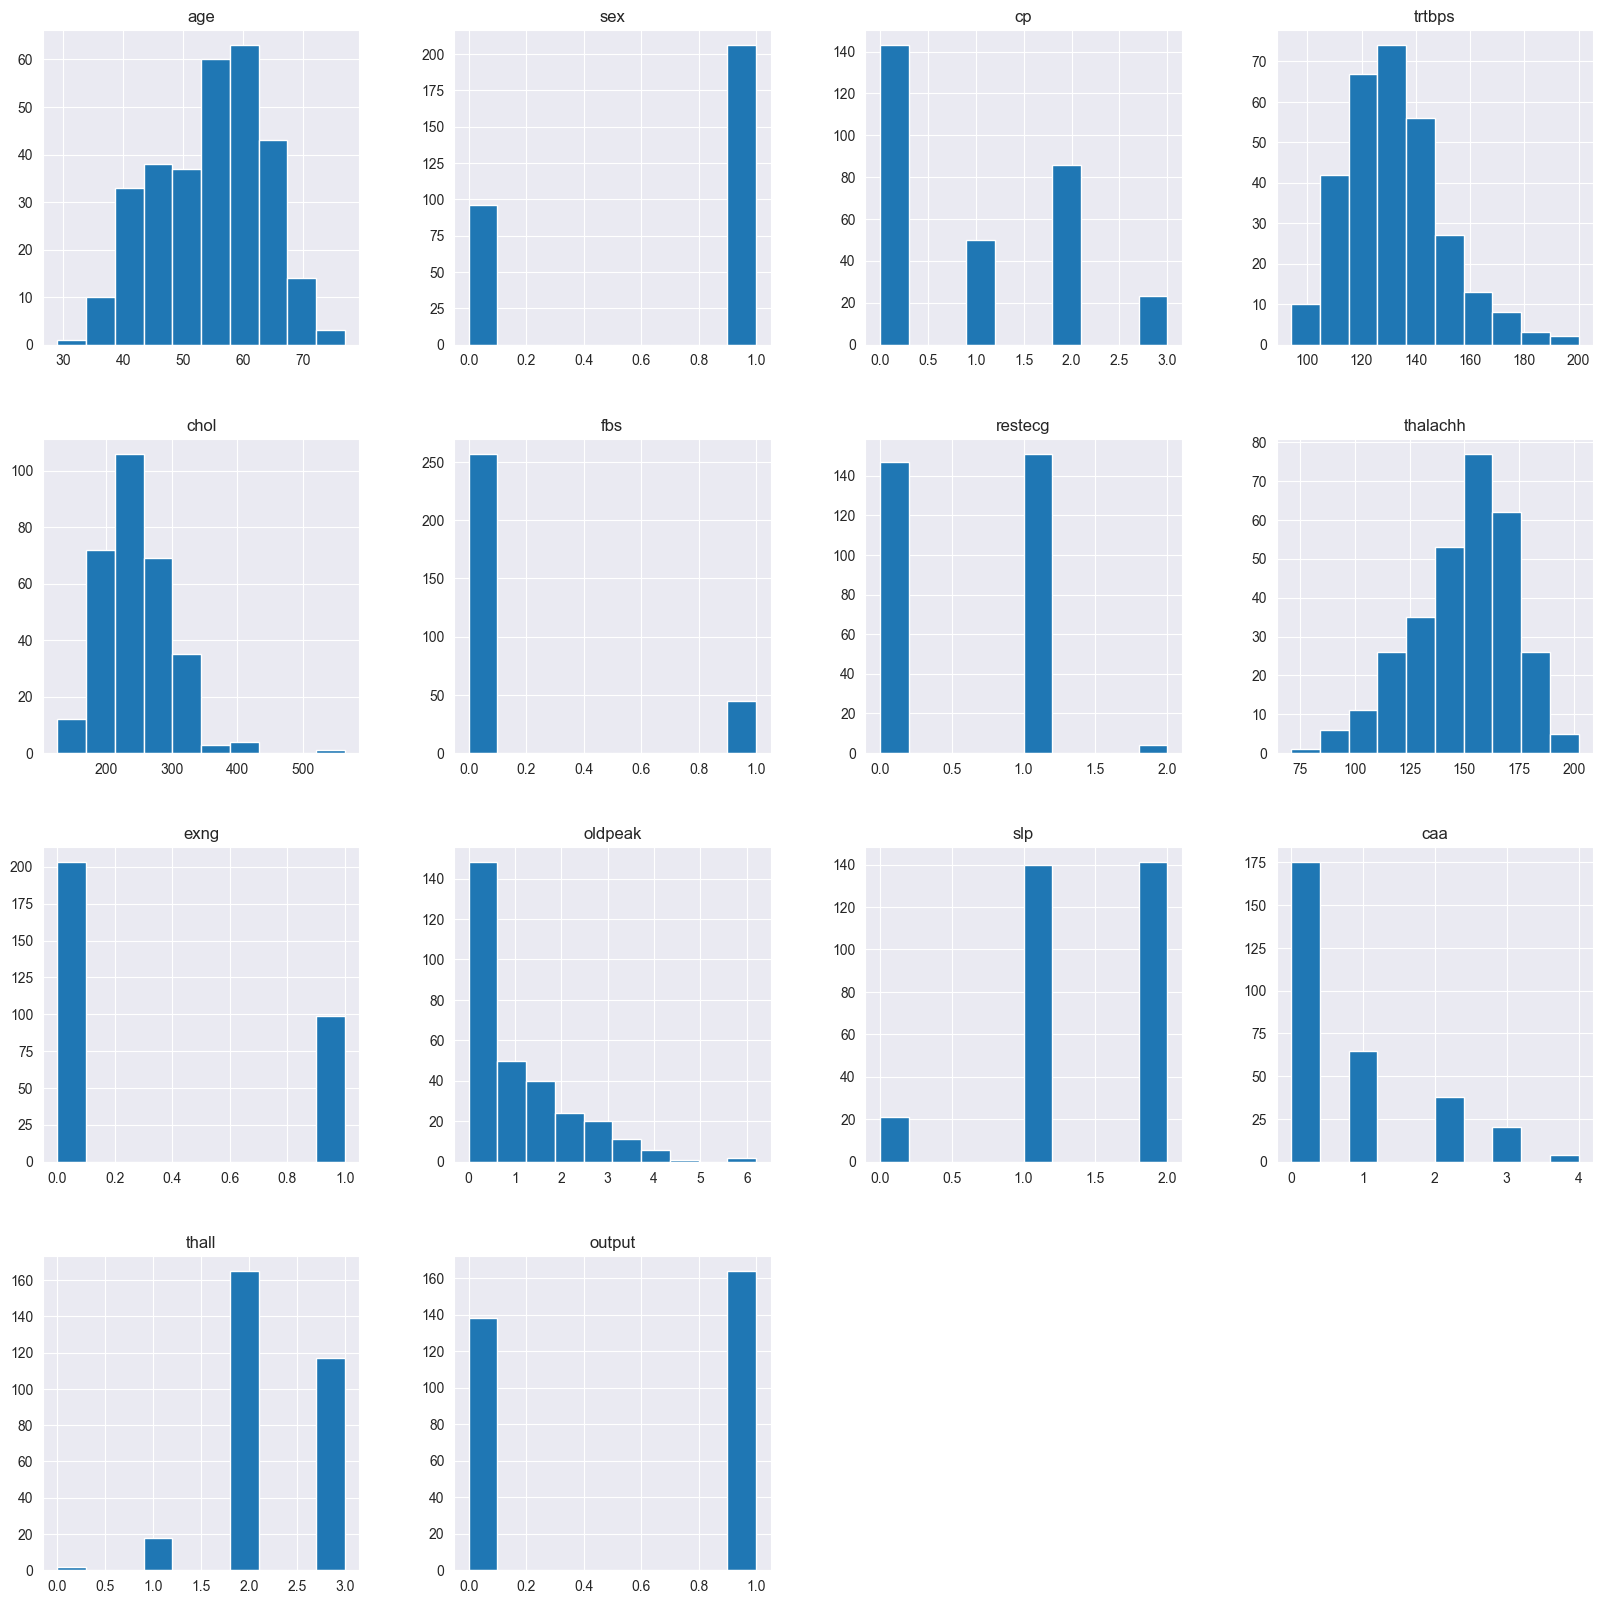

In [13]:
df.hist(figsize=(20,20))

Text(0.5, 1.0, 'Density Curve of thall')

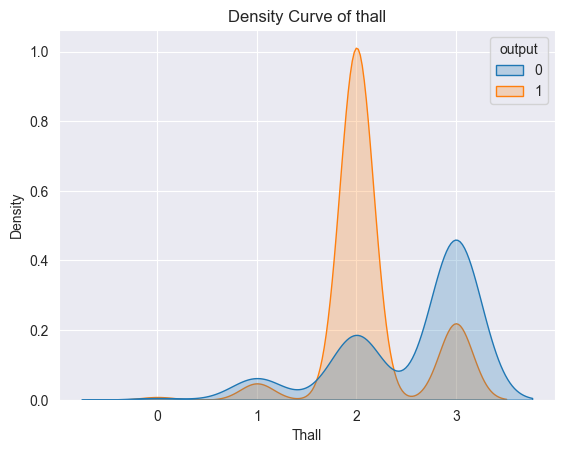

In [14]:
sns.kdeplot(x=df.thall, hue=df.output, shade=True)
plt.xlabel('Thall')
plt.title('Density Curve of thall')

Text(0.5, 1.0, 'Density Curve of Chest Pain')

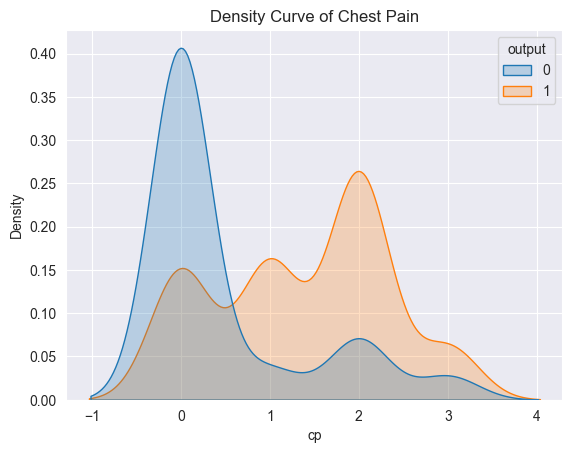

In [15]:
sns.kdeplot(x=df.cp, hue=df.output, shade=True)
plt.xlabel('cp')
plt.title('Density Curve of Chest Pain')

Text(0.5, 1.0, 'Density Curve of Oldpeak')

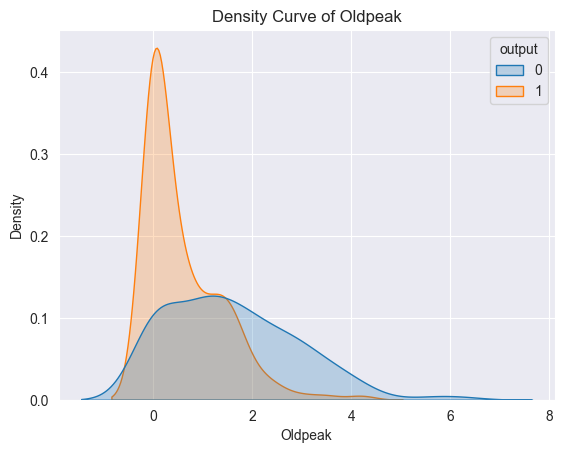

In [16]:
sns.kdeplot(x=df.oldpeak, hue=df.output, shade=True)
plt.xlabel('Oldpeak')
plt.title('Density Curve of Oldpeak')

Text(0.5, 1.0, 'Density Curve of Cholestrol')

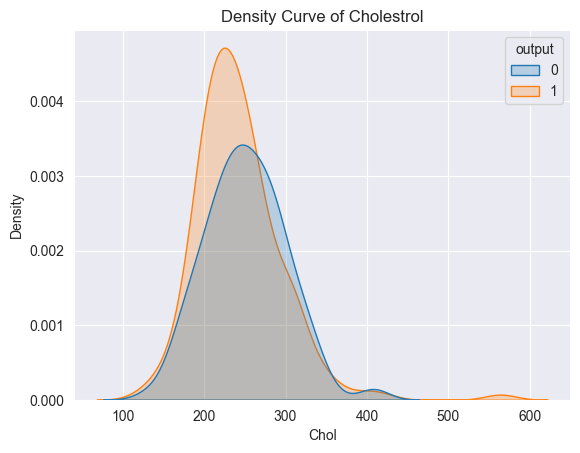

In [17]:
sns.kdeplot(x=df.chol, hue=df.output, shade=True)
plt.xlabel('Chol')
plt.title('Density Curve of Cholestrol')

Text(0.5, 1.0, 'Density Curve of Exercise induced Angina')

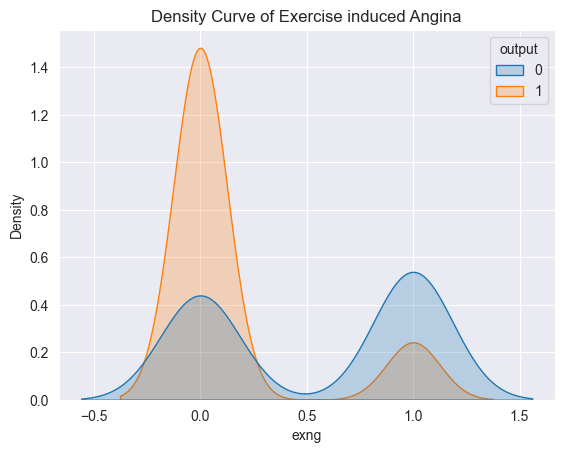

In [18]:
sns.kdeplot(x=df.exng, hue=df.output, shade=True)
plt.xlabel('exng')
plt.title('Density Curve of Exercise induced Angina')

Text(0.5, 1.0, 'Density Curve of caa')

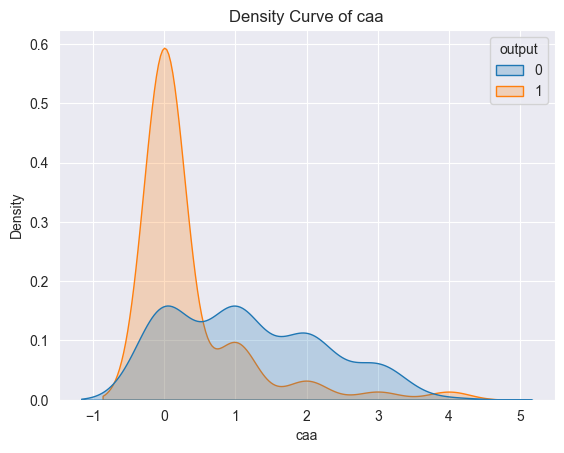

In [19]:
sns.kdeplot(x=df.caa, hue=df.output, shade=True)
plt.xlabel('caa')
plt.title('Density Curve of caa')

Text(0.5, 1.0, 'Density Curve of Heart Rate')

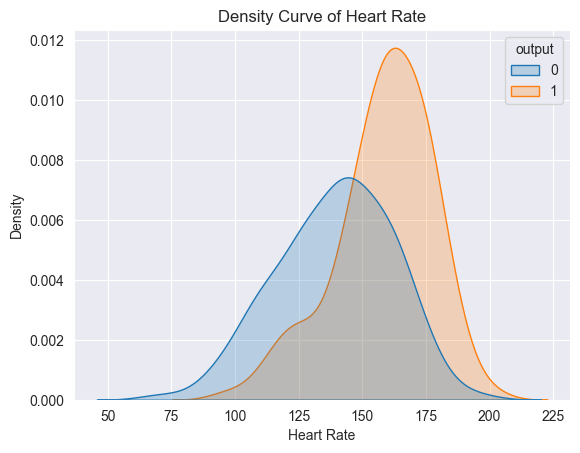

In [20]:
sns.kdeplot(x=df.thalachh, hue=df.output, shade=True)
plt.xlabel('Heart Rate')
plt.title('Density Curve of Heart Rate')

**Conclusions or Key Takeaways from the EDA:**
1. There are no NaN values in the dataset. 
2. The data consists of twice the no. of either males or females i.e sex = 1 to that of sex = 0. (From the plot of sex w.r.t target)
3. We see certain outliers present in the independent variables too. 
4. Often we assume that the older age people tend to have heart diseases but according to the dataset, this isn't true. (From the plot of age w.r.t target)
5. Persons with age between 50-60 have the highest possibility of heart diseases. (From the plot of age w.r.t target)
6. Persons with thall = 2 has high chances of a heart disease. (Density Curve of thall)
7. People with cp = 2 i.e. having non-anginal chest pain (pain a person without heart disease may feel behind the breast bone) have higher risk of heart  
   disease, while cp = 0 has the lower risk.
8. As the kde plot shows, persons with lower previous peak got the higher chances of a heart disease. (Density Curve of oldpeak)
9. People with no exercise induced angina i.e. exng = 0 has high chances of heart disease. (Density Curve of Exercise induced Angina)
10. People with sex = 1 has more no. of heart diseases and they survived more too. (Sex w.r.t output)
11. People with caa = 0 has higher heart diseases. (Density curve of caa)
12. People with higher heart rate has a lot of possibilty of having a heart disease. (Density Curve of Heart Rate)

## **Data Processing**

After almost exploring the dataset, we can observe that we need to convert our categorial variables into dummy variables and scale all the values before using them in the algorithms and training the ML models. So, let's use the "get_dummies" method to create the dummy variables of all the categorial variables.

In [21]:
cat_variables = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
dataset = pd.get_dummies(df, columns = cat_variables)
dataset.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,cp_0,cp_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,56,120,236,178,0.8,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,57,120,354,163,0.6,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


In [22]:
scaler = RobustScaler()
cl_to_scale = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
dataset[cl_to_scale] = scaler.fit_transform(dataset[cl_to_scale])
dataset.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,cp_0,cp_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,0.576923,0.75,-0.117647,-0.076336,0.9375,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,-1.423077,0.00,0.149020,1.053435,1.6875,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,-1.115385,0.00,-0.572549,0.595420,0.3750,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,0.038462,-0.50,-0.070588,0.778626,0.0000,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,0.115385,-0.50,1.780392,0.320611,-0.1250,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


In [23]:
df_corr = dataset[cl_to_scale].corr().transpose()
df_corr

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.283121,0.207216,-0.395235,0.206040
trtbps,0.283121,1.000000,0.125256,-0.048023,0.194600
chol,0.207216,0.125256,1.000000,-0.005308,0.050086
thalachh,-0.395235,-0.048023,-0.005308,1.000000,-0.342201
oldpeak,0.206040,0.194600,0.050086,-0.342201,1.000000


From the above dataset, we can coclude that there seems to be no correlation between the continuous variables. 

In [24]:
X = dataset.drop('output', axis=1)
y = dataset.output

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

## **Classifiers**

### Linear Regression

In [26]:
linear_Reg = LinearRegression()
model1 = cross_val_score(linear_Reg, X, y, cv=10)
print(f"Avg. Cross Val. Score for linear Regression = {model1.mean(): .3f}")

Avg. Cross Val. Score for linear Regression =  0.036


Cross Validation Score of **linear Regression** on this model = **0.04**

### Logistic Regression

In [27]:
log_Reg = LogisticRegression()
model2 = cross_val_score(log_Reg, X, y, cv=10)
print(f"Avg. Cross Val. Score for logistic Regression = {model2.mean(): .3f}")

Avg. Cross Val. Score for logistic Regression =  0.844


Cross Validation Score of **Logistic Regression** on this model = **0.844**

In [28]:
# fitting the object
log_Reg.fit(X_train, y_train)

LogisticRegression()

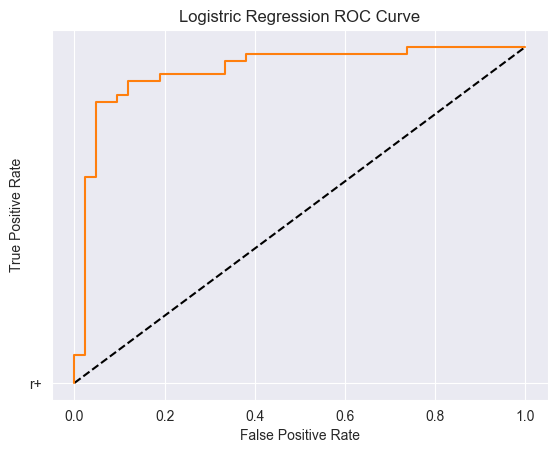

In [29]:
# calculating the probabilities
y_pred_prob = log_Reg.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
sns.axes_style('darkgrid')
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()


### Decision Tree

In [30]:
Dec_Tree = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=5)
cv = StratifiedKFold(n_splits=10)
model3 = cross_val_score(Dec_Tree, X, y, cv=cv)
print(f"Avg. Cross Val. Score for Decision Tree = {model3.mean(): .3f}")

Avg. Cross Val. Score for Decision Tree =  0.765


Cross Validation Score of **Decision Tree** on this model = **0.765**

In [31]:
# fitting the object
Dec_Tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

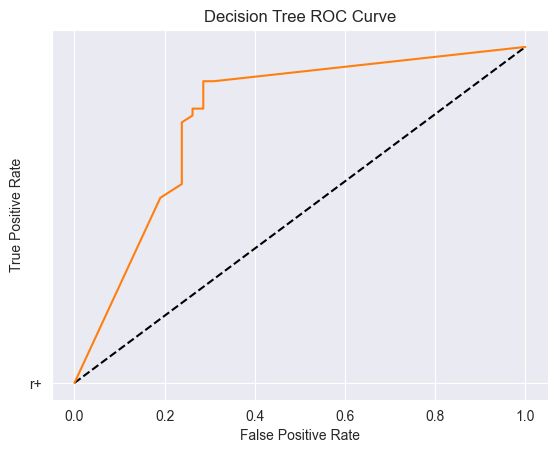

In [32]:
# calculating the probabilities
y_pred_prob = Dec_Tree.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Decision Tree')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curve")
plt.show()

### Random Forest

In [74]:
Rand_Forest = RandomForestClassifier(n_estimators=12)
model4 = cross_val_score(Rand_Forest, X, y, cv=cv)
print(f"Avg. Cross Val. Score for Random Forest = {model4.mean(): .3f}")

Avg. Cross Val. Score for Random Forest =  0.835


Cross Validation Score of **Random Forest** on this model = **0.835**

In [34]:
#Fitting the object
Rand_Forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=12)

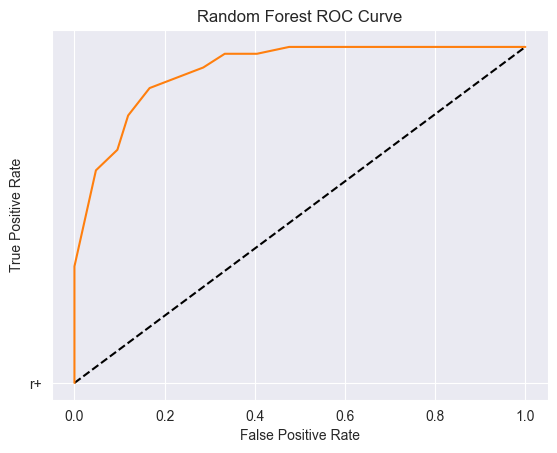

In [35]:
# calculating the probabilities
y_pred_prob = Rand_Forest.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Random Forest')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.show()

### SVM

In [36]:
svm = SVC(gamma='auto', C=1)
model5 = cross_val_score(svm, X, y, cv=cv)
print(f"Avg. Cross Val. Score for SVM = {model5.mean(): .3f}")

Avg. Cross Val. Score for SVM =  0.838


Cross Validation Score of **SVM** on this model = **0.838**

In [37]:
# Fitting the object
svm.fit(X_train, y_train)

SVC(C=1, gamma='auto')

### KNearestNeighbor

In [38]:
knn = KNeighborsClassifier(n_neighbors=10)
model6 = cross_val_score(knn, X, y, cv=cv)
print(f"Avg. Cross Val. Score for KNN = {model6.mean(): .3f}")

Avg. Cross Val. Score for KNN =  0.828


Cross Validation Score of **KNearestNeighbor** on this model = **0.828**

In [39]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

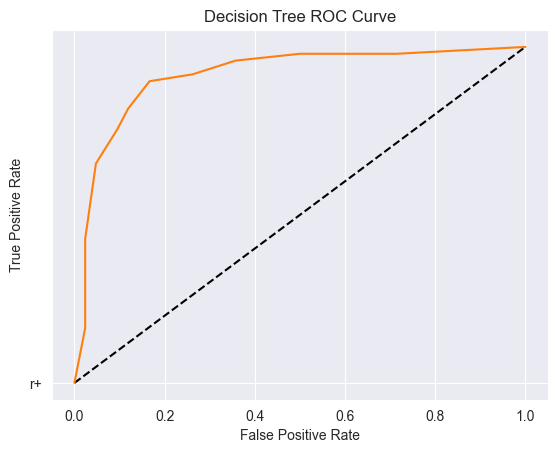

In [40]:
# calculating the probabilities
y_pred_prob = knn.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Decision Tree')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curve")
plt.show()

### AdaBoost Classifier

In [41]:
adaboost = AdaBoostClassifier()
model7 = cross_val_score(adaboost, X, y, cv=cv)
print(f"Avg. Cross Val. Score for AdaBoost Classifier = {model7.mean(): .3f}")

Avg. Cross Val. Score for AdaBoost Classifier =  0.807


Cross Validation Score of **AdaBoost Classifier** on this model = **0.808**

In [42]:
adaboost.fit(X_train, y_train)

AdaBoostClassifier()

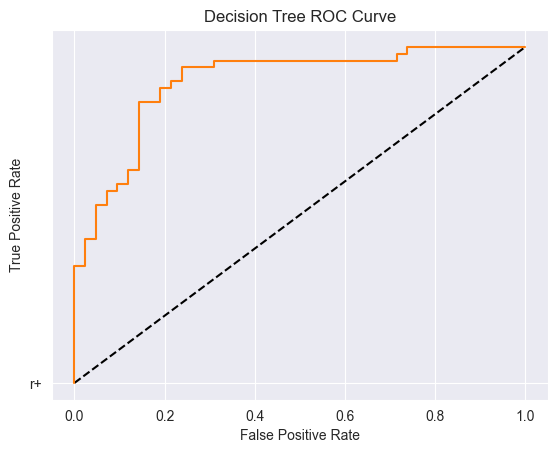

In [43]:
# calculating the probabilities
y_pred_prob = adaboost.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Decision Tree')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curve")
plt.show()

### Gaussian Naive Bayes Classifier

In [44]:
gnb = GaussianNB()
model8 = cross_val_score(gnb, X, y, cv=cv)
print(f"Avg. Cross Val. Score for Gaussian Naive Bayes Classifier = {model8.mean(): .3f}")

Avg. Cross Val. Score for Gaussian Naive Bayes Classifier =  0.798


Cross Validation Score of **Gaussian Naive Bayes Classifier** on this model = **0.798**

In [45]:
gnb.fit(X_train, y_train)

GaussianNB()

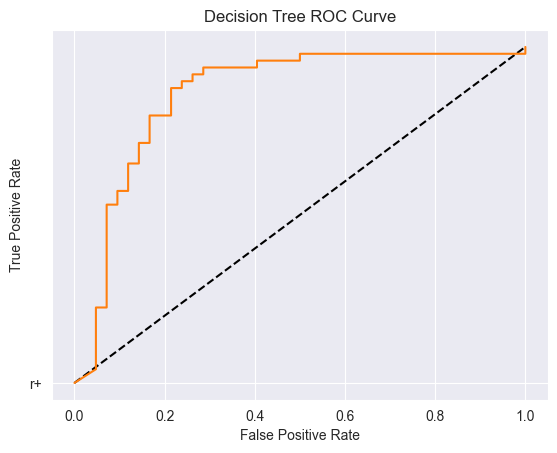

In [46]:
# calculating the probabilities
y_pred_prob = gnb.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Decision Tree')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curve")
plt.show()

### Gradient Boosting Classifer

In [47]:
gb = GradientBoostingClassifier(learning_rate=0.02, n_estimators=100)
model9 = cross_val_score(gb, X, y, cv=cv)
print(f"Avg. Cross Val. Score for Gradient Boosting Classifier = {model9.mean(): .3f}")

Avg. Cross Val. Score for Gradient Boosting Classifier =  0.821


Cross Validation Score of **Gradient Boosting Classifier** on this model = **0.821**

In [48]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.02)

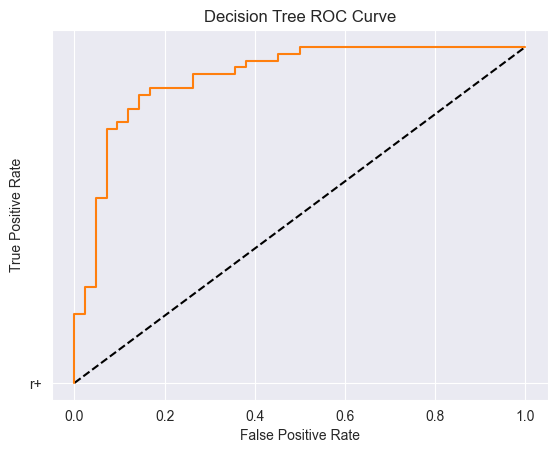

In [49]:
# calculating the probabilities
y_pred_prob = gb.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Decision Tree')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curve")
plt.show()

### Conclusion

In [75]:
result = pd.DataFrame([['Linear Regression', 0.04], 
                       ['logistic Regression', 0.844],
                       ['Decision Tree', 0.765], 
                       ['Random Forest', 0.835], 
                       ['SVM', 0.838], 
                       ['KNN', 0.828], 
                       ['AdaBoost Classifier', 0.807], 
                       ['Gaussian Naive Bayes Classifier', 0.798], 
                       ['Gradient Boosting Classifier', 0.821]], 
                       columns=['Classifiers', 'Accuracy'])
result

,Classifiers,Accuracy
0,Linear Regression,0.040
1,logistic Regression,0.844
2,Decision Tree,0.765
3,Random Forest,0.835
4,SVM,0.838
5,KNN,0.828
6,AdaBoost Classifier,0.807
7,Gaussian Naive Bayes Classifier,0.798
8,Gradient Boosting Classifier,0.821


In [76]:
result.sort_values('Accuracy', ascending=False)

,Classifiers,Accuracy
1,logistic Regression,0.844
4,SVM,0.838
3,Random Forest,0.835
5,KNN,0.828
8,Gradient Boosting Classifier,0.821
6,AdaBoost Classifier,0.807
7,Gaussian Naive Bayes Classifier,0.798
2,Decision Tree,0.765
0,Linear Regression,0.040


Since, the top four in the above cell have a very well accuracy, we can chose any of them. But I will go with Random Forest because the dataset provides me with various inputs which are essential to be categorized correctly with the appropriate conditions. From the EDA, we came across some essential conclusions, which are in a way are the conditions helping us to predict if the person has heart disease or not. So, I think Random Forest Classifier can correctly use the conditions to predict the target value.

## **MODEL**

In [52]:
model = RandomForestClassifier(n_estimators=12)
model.fit(X, y)

RandomForestClassifier(n_estimators=12)

So, now our model can help predict patients, if they have a heart disease or not.